In [1]:
import os
import h5py 
import numpy as np 
# -- local -- 
from feasibgs import util as UT
from feasibgs import catalogs as Cat
from feasibgs import forwardmodel as FM

In [2]:
import matplotlib as mpl 
import matplotlib.pyplot as pl 
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False
%matplotlib inline

In [3]:
cata = Cat.GamaLegacy()
gleg = cata.Read()

In [4]:
r_mag = UT.flux2mag(gleg['legacy-photo']['apflux_r'][:,1], method='log')

/Users/chang/anaconda2/lib/python2.7/site-packages/feasibgs-0.0.0-py2.7.egg/feasibgs/util.py:30: RuntimeWarning: divide by zero encountered in log10


In [5]:
float(np.sum(np.isfinite(r_mag)))/float(len(r_mag))

0.9861920064269933

In [6]:
no_rmag = np.invert(np.isfinite(r_mag))

(16.0, 21.0)

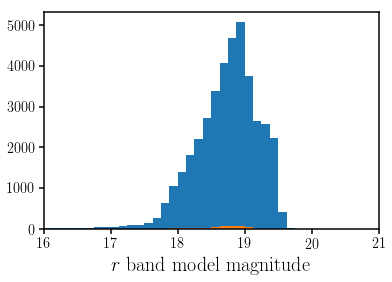

In [7]:
fig = plt.figure()
sub = fig.add_subplot(111)
_ = sub.hist(gleg['gama-photo']['modelmag_r'], color='C0', histtype='stepfilled', range=(16, 21), bins=40)
_ = sub.hist(gleg['gama-photo']['modelmag_r'][no_rmag], color='C1', histtype='stepfilled', range=(16, 21), bins=40)
sub.set_xlabel(r'$r$ band model magnitude', fontsize=20)
sub.set_xlim([16., 21.])

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.


(16.0, 21.0)

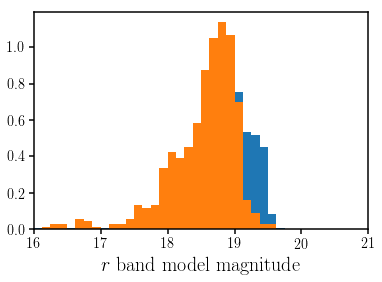

In [8]:
fig = plt.figure()
sub = fig.add_subplot(111)
_ = sub.hist(gleg['gama-photo']['modelmag_r'], color='C0', histtype='stepfilled', range=(16, 21), bins=40, normed=True)
_ = sub.hist(gleg['gama-photo']['modelmag_r'][no_rmag], color='C1', histtype='stepfilled', range=(16, 21), bins=40, normed=True)
sub.set_xlabel(r'$r$ band model magnitude', fontsize=20)
sub.set_xlim([16., 21.])

(15, 25)

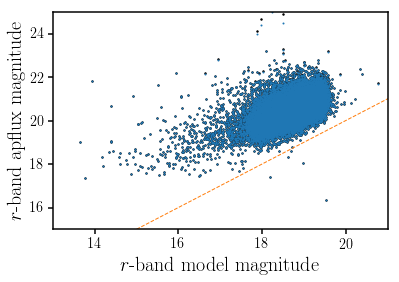

In [9]:
fig = plt.figure()
sub = fig.add_subplot(111)
sub.scatter(gleg['gama-photo']['modelmag_r'], r_mag, s=2, c='k')
sub.scatter(gleg['gama-photo']['modelmag_r'], UT.flux2mag(gleg['legacy-photo']['apflux_r'][:,1]), s=1, c='C0')
sub.plot([0., 25.], [0., 25.], c='C1', lw=1, ls='--')
sub.set_xlabel('$r$-band model magnitude', fontsize=20)
sub.set_xlim([13, 21])
sub.set_ylabel('$r$-band apflux magnitude', fontsize=20)
sub.set_ylim([15, 25])

(13, 23)

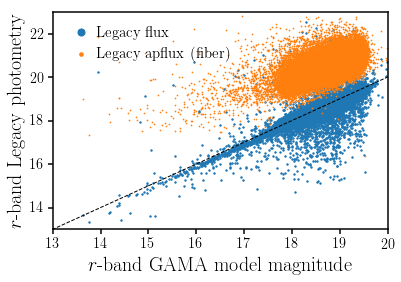

In [20]:
fig = plt.figure()
sub = fig.add_subplot(111)
sub.scatter(gleg['gama-photo']['modelmag_r'], UT.flux2mag(gleg['legacy-photo']['flux_r']), s=2, c='C0', 
           label='Legacy flux')
sub.scatter(gleg['gama-photo']['modelmag_r'], r_mag, s=0.5, c='C1', 
           label='Legacy apflux (fiber)')
sub.plot([0., 25.], [0., 25.], c='k', lw=1, ls='--')
sub.legend(loc='upper left', markerscale=5, handletextpad=0., prop={'size':15})
sub.set_xlabel('$r$-band GAMA model magnitude', fontsize=20)
sub.set_xlim([13, 20])
sub.set_ylabel('$r$-band Legacy photometry', fontsize=20)
sub.set_ylim([13, 23])